In [2]:
pip install faker

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/1.8 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.8 MB 28.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 19.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from faker import Faker
import random
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

In [2]:
# Descargar recursos de NLTK
nltk.download('punkt')

# Descargar más recursos necesarios
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deyvi.caicedo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deyvi.caicedo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\deyvi.caicedo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\deyvi.caicedo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Función de preprocesamiento
def preprocess(text):
    tokens = nltk.word_tokenize(text)
    return ' '.join(tokens)  # Devolver el texto tokenizado como una cadena

In [4]:
# Inicializar el stemmer y el lematizador
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Obtener la lista de stop words
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Normalización: convertir a minúsculas y eliminar caracteres especiales
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Eliminar caracteres especiales
    text = re.sub(r'\s+', ' ', text).strip()  # Eliminar espacios extra

    # Tokenización
    tokens = nltk.word_tokenize(text)
    
    # Eliminar stop words y aplicar stemming y lematización
    processed_tokens = []
    for token in tokens:
        if token not in stop_words:
            stemmed = stemmer.stem(token)
            lemmatized = lemmatizer.lemmatize(stemmed)
            processed_tokens.append(lemmatized)
    
    # Unir los tokens procesados en una sola cadena
    return ' '.join(processed_tokens)

# Ejemplo de texto para preprocesar
example_text = "NLTK is a powerful toolkit for natural language processing."

# Aplicar la rutina de preprocesamiento
processed_text = preprocess(example_text)
print("Texto original:", example_text)
print("Texto preprocesado:", processed_text)

Texto original: NLTK is a powerful toolkit for natural language processing.
Texto preprocesado: nltk power toolkit natur languag process


In [5]:
# Datos de ejemplo
data = [
    ("I love this movie", "positive"),
    ("This movie is terrible", "negative"),
    ("This movie is great", "positive"),
    ("I dislike this movie", "negative"),
    ("This film is amazing", "positive"),
    ("I can't stand watching this movie", "negative"),
    ("The acting in this movie is phenomenal", "positive"),
    ("I regret wasting my time on this film", "negative"),
    ("I thoroughly enjoyed this movie", "positive"),
    ("This movie lacks depth and substance", "negative"),
    ("The plot of this movie was captivating", "positive"),
    ("I found the characters in this film to be very engaging", "positive"),
    ("The special effects in this movie were impressive", "positive"),
    ("The storyline was predictable and unoriginal", "negative"),
    ("I was disappointed by the lack of character development", "negative"),
    ("The cinematography in this film was stunning", "positive"),
    ("The dialogue felt forced and unnatural", "negative"),
    ("The pacing of the movie was too slow for my liking", "negative"),
    ("I was pleasantly surprised by how much I enjoyed this film", "positive"),
    ("The ending left me feeling unsatisfied and confused", "negative"),
    ("This movie exceeded my expectations", "positive"),
    ("The performances by the actors were lackluster", "negative")
]

In [6]:
# Crear datos sintéticos
fake = Faker()

In [7]:
def generate_synthetic_data(num_samples=40000):
    synthetic_data = []
    sentiments = ["positive", "negative"]
    for _ in range(num_samples):
        text = fake.text(max_nb_chars=200)
        sentiment = random.choice(sentiments)
        synthetic_data.append((text, sentiment))
    
    return synthetic_data    

In [8]:
# Ampliar el dataset con datos sintéticos
synthetic_data = generate_synthetic_data()
data.extend(synthetic_data)

In [9]:
# Verificar la cantidad de datos originales y sintéticos
print(f"Cantidad de datos originales: {len(data) - len(synthetic_data)}")
print(f"Cantidad de datos sintéticos: {len(synthetic_data)}")
print(f"Cantidad total de datos: {len(data)}")

Cantidad de datos originales: 22
Cantidad de datos sintéticos: 40000
Cantidad total de datos: 40022


In [10]:
# Mostrar una muestra de los datos sintéticos añadidos
print("\nMuestra de datos sintéticos añadidos:")
for i in range(min(5, len(synthetic_data))):  # Muestra las primeras 5 entradas, o menos si hay menos de 5
    print(f"Texto: {synthetic_data[i][0]}")
    print(f"Etiqueta: {synthetic_data[i][1]}")
    print("-" * 40)


Muestra de datos sintéticos añadidos:
Texto: Just mission green chair sit price beat. Prove sit gas away hand board air.
Herself degree none trouble hit recognize. Among boy value side range Congress her.
Etiqueta: positive
----------------------------------------
Texto: Window machine democratic. Successful develop behind role.
Others public account include. Meet but light whole material course according. Natural list live degree gas.
Etiqueta: positive
----------------------------------------
Texto: By me population oil. Grow color great ready responsibility. Buy reveal also continue might fact past. Some significant father area.
Etiqueta: positive
----------------------------------------
Texto: Night stop just both degree. Attorney would record weight up product.
His wonder whatever Republican certain.
Direction result rock consumer road.
Etiqueta: negative
----------------------------------------
Texto: Concern around husband me agree know. Doctor middle government city simply. Cr

C:\Users\deyvi.caicedo\AppData\Local\Temp\ipykernel_9700\3130119936.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='viridis')


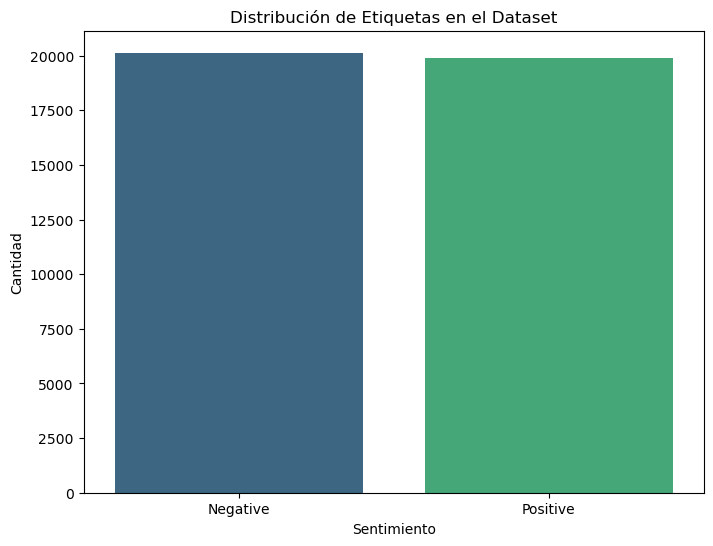

In [11]:
# Visualizar la distribución de etiquetas en el conjunto de datos
labels = [label for (text, label) in data]

plt.figure(figsize=(8, 6))
sns.countplot(x=labels, palette='viridis')
plt.title('Distribución de Etiquetas en el Dataset')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

In [12]:
# Preparar datos
texts, labels = zip(*data)
texts = [preprocess(text) for text in texts]

In [13]:
# Mostrar una muestra de los datos sintéticos añadidos
print("\nMuestra de datos sintéticos añadidos:")
for i in range(min(5, len(texts))):  # Muestra las primeras 5 entradas, o menos si hay menos de 5
    print(f"Texto: {texts[i][0]}")
    print(f"Etiqueta: {texts[i][1]}")
    print("-" * 40)


Muestra de datos sintéticos añadidos:
Texto: l
Etiqueta: o
----------------------------------------
Texto: m
Etiqueta: o
----------------------------------------
Texto: m
Etiqueta: o
----------------------------------------
Texto: d
Etiqueta: i
----------------------------------------
Texto: f
Etiqueta: i
----------------------------------------


In [14]:
# Convertir texto a características numéricas
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
y = np.array(labels)

In [15]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Definir y entrenar modelos
models = {
    'SVM': SVC(kernel='linear', probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

results = {}

In [ ]:
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

    # Evaluar el modelo
    accuracy = model.score(X_test, y_test)
    report = classification_report(y_test, y_pred, target_names=["positive", "negative"])
    cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
    
    # Calcular la curva ROC
    binary_labels = [1 if label == "positive" else 0 for label in y_test]
    binary_predictions = [1 if pred == "positive" else 0 for pred in y_pred]
    fpr, tpr, _ = roc_curve(binary_labels, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Guardar los resultados
    results[model_name] = {
        'accuracy': accuracy,
        'report': report,
        'cm': cm,
        'roc_auc': roc_auc,
        'fpr': fpr,
        'tpr': tpr
    }

    # Imprimir resultados
    print(f"\n{model_name} Classification Report:")
    print(report)
    
    # Mostrar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["positive", "negative"], yticklabels=["positive", "negative"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    # Graficar la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    # Calcular y mostrar el histograma de errores
    errors = [1 if binary_labels[i] != binary_predictions[i] else 0 for i in range(len(binary_labels))]
    error_counts = Counter(errors)
    plt.figure()
    plt.bar(error_counts.keys(), error_counts.values(), color='skyblue')
    plt.xlabel('Error (0: Correcto, 1: Incorrecto)')
    plt.ylabel('Número de Casos')
    plt.title(f'{model_name} Histograma de Errores')
    plt.xticks([0, 1], ['Correcto', 'Incorrecto'])
    plt.show()

In [ ]:
# Comparación final
print("Model Comparison Results:")
for model_name, result in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"ROC AUC: {result['roc_auc']:.2f}")
